In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import graphviz 
import matplotlib.pyplot as plt
import pylab
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

final_dataset = pd.read_excel('FINAL.xlsx')

## Some extra data preprocessing

In [3]:
final_dataset.head()

,age,age_group,job,marital,education,housing,loan,contact,month,day_of_week,...,pdays,is_contact_before,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,High,housemaid,married,basic.4y,no,no,telephone,may,mon,...,999,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,High,services,married,high.school,no,no,telephone,may,mon,...,999,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,Middle,services,married,high.school,yes,no,telephone,may,mon,...,999,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,Middle,admin.,married,basic.6y,no,no,telephone,may,mon,...,999,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,High,services,married,high.school,no,yes,telephone,may,mon,...,999,0,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


we need to get the dummies of some of the features so we could see the name of the them and may get the importance of them in the models(past idea, now dropped)

In [4]:
raw_col_name = list(final_dataset.columns)
raw_col_name

['age',
 'age_group',
 'job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'is_contact_before',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'y']

In [5]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown = 'ignore')

#perform one-hot encoding on 'age_group' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['age_group']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age = final_dataset.join(encoder_df)

raw_col_name.extend(['age_fundemental', 'age_high', 'age_middle', 'age_retire'])
final_df_age.columns = raw_col_name

#drop the raw column
final_df_age.drop('age_group', axis=1, inplace=True)
raw_col_name = list(final_df_age.columns)

#view final df
print(final_df_age)


       age          job  marital            education housing loan    contact  \
0       56    housemaid  married             basic.4y      no   no  telephone   
1       57     services  married          high.school      no   no  telephone   
2       37     services  married          high.school     yes   no  telephone   
3       40       admin.  married             basic.6y      no   no  telephone   
4       56     services  married          high.school      no  yes  telephone   
...    ...          ...      ...                  ...     ...  ...        ...   
29899   29   unemployed   single             basic.4y     yes   no   cellular   
29900   73      retired  married  professional.course     yes   no   cellular   
29901   46  blue-collar  married  professional.course      no   no   cellular   
29902   56      retired  married    university.degree     yes   no   cellular   
29903   44   technician  married  professional.course      no   no   cellular   

      month day_of_week  du

In [6]:
#perform one-hot encoding on 'job' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['job']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job = final_df_age.join(encoder_df)

raw_col_name.extend(['job_admin', 'job_blue_collar', 'job_entrepreneur', \
                     'job_housemaid', 'job_management', 'job_retired', \
                    'job_self_employed', 'job_services', 'job_student', \
                    'job_technician', 'job_unemployed'])
final_df_age_job.columns = raw_col_name

#drop the raw column
final_df_age_job.drop('job', axis=1, inplace=True)
raw_col_name = list(final_df_age_job.columns)

#view final df
print(final_df_age_job)

       age  marital            education housing loan    contact month  \
0       56  married             basic.4y      no   no  telephone   may   
1       57  married          high.school      no   no  telephone   may   
2       37  married          high.school     yes   no  telephone   may   
3       40  married             basic.6y      no   no  telephone   may   
4       56  married          high.school      no  yes  telephone   may   
...    ...      ...                  ...     ...  ...        ...   ...   
29899   29   single             basic.4y     yes   no   cellular   nov   
29900   73  married  professional.course     yes   no   cellular   nov   
29901   46  married  professional.course      no   no   cellular   nov   
29902   56  married    university.degree     yes   no   cellular   nov   
29903   44  married  professional.course      no   no   cellular   nov   

      day_of_week  duration  campaign  ...  job_blue_collar  job_entrepreneur  \
0             mon       261   

In [7]:
#perform one-hot encoding on 'marital' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['marital']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital = final_df_age_job.join(encoder_df)

raw_col_name.extend(['marital_divorced', 'marital_married', 'marital_single'])
final_df_age_job_marital.columns = raw_col_name

#drop the raw column
final_df_age_job_marital.drop('marital', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital.columns)

#view final df
print(final_df_age_job_marital)

       age            education housing loan    contact month day_of_week  \
0       56             basic.4y      no   no  telephone   may         mon   
1       57          high.school      no   no  telephone   may         mon   
2       37          high.school     yes   no  telephone   may         mon   
3       40             basic.6y      no   no  telephone   may         mon   
4       56          high.school      no  yes  telephone   may         mon   
...    ...                  ...     ...  ...        ...   ...         ...   
29899   29             basic.4y     yes   no   cellular   nov         fri   
29900   73  professional.course     yes   no   cellular   nov         fri   
29901   46  professional.course      no   no   cellular   nov         fri   
29902   56    university.degree     yes   no   cellular   nov         fri   
29903   44  professional.course      no   no   cellular   nov         fri   

       duration  campaign  pdays  ...  job_management  job_retired  \
0    

In [8]:
#perform one-hot encoding on 'education' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['education']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education = final_df_age_job_marital.join(encoder_df)

raw_col_name.extend(['education_basic_4y', 'education_basic_6y', 'education_basic_9y', \
                    'education_high_school', 'education_illiterate', 'education_professional_course', \
                    'education_university_degree'])
final_df_age_job_marital_education.columns = raw_col_name

#drop the raw column
final_df_age_job_marital_education.drop('education', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education.columns)

#view final df
print(final_df_age_job_marital_education)

       age housing loan    contact month day_of_week  duration  campaign  \
0       56      no   no  telephone   may         mon       261         1   
1       57      no   no  telephone   may         mon       149         1   
2       37     yes   no  telephone   may         mon       226         1   
3       40      no   no  telephone   may         mon       151         1   
4       56      no  yes  telephone   may         mon       307         1   
...    ...     ...  ...        ...   ...         ...       ...       ...   
29899   29     yes   no   cellular   nov         fri       112         1   
29900   73     yes   no   cellular   nov         fri       334         1   
29901   46      no   no   cellular   nov         fri       383         1   
29902   56     yes   no   cellular   nov         fri       189         2   
29903   44      no   no   cellular   nov         fri       442         1   

       pdays  is_contact_before  ...  marital_divorced marital_married  \
0        999 

In [9]:
#perform one-hot encoding on 'housing' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['housing']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education_housing = final_df_age_job_marital_education.join(encoder_df)

raw_col_name.extend(['house_no', 'house_yes'])
final_df_age_job_marital_education_housing.columns = raw_col_name

#drop the raw column
final_df_age_job_marital_education_housing.drop('housing', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education_housing.columns)

#view final df
print(final_df_age_job_marital_education_housing)

       age loan    contact month day_of_week  duration  campaign  pdays  \
0       56   no  telephone   may         mon       261         1    999   
1       57   no  telephone   may         mon       149         1    999   
2       37   no  telephone   may         mon       226         1    999   
3       40   no  telephone   may         mon       151         1    999   
4       56  yes  telephone   may         mon       307         1    999   
...    ...  ...        ...   ...         ...       ...       ...    ...   
29899   29   no   cellular   nov         fri       112         1      9   
29900   73   no   cellular   nov         fri       334         1    999   
29901   46   no   cellular   nov         fri       383         1    999   
29902   56   no   cellular   nov         fri       189         2    999   
29903   44   no   cellular   nov         fri       442         1    999   

       is_contact_before  previous  ... marital_single  education_basic_4y  \
0                    

In [10]:
#perform one-hot encoding on 'loan' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['loan']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education_housing_loan = final_df_age_job_marital_education_housing.join(encoder_df)

raw_col_name.extend(['loan_no', 'loan_yes'])
final_df_age_job_marital_education_housing_loan.columns = raw_col_name

#drop the raw column
final_df_age_job_marital_education_housing_loan.drop('loan', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education_housing_loan.columns)

#view final df
print(final_df_age_job_marital_education_housing_loan)

       age    contact month day_of_week  duration  campaign  pdays  \
0       56  telephone   may         mon       261         1    999   
1       57  telephone   may         mon       149         1    999   
2       37  telephone   may         mon       226         1    999   
3       40  telephone   may         mon       151         1    999   
4       56  telephone   may         mon       307         1    999   
...    ...        ...   ...         ...       ...       ...    ...   
29899   29   cellular   nov         fri       112         1      9   
29900   73   cellular   nov         fri       334         1    999   
29901   46   cellular   nov         fri       383         1    999   
29902   56   cellular   nov         fri       189         2    999   
29903   44   cellular   nov         fri       442         1    999   

       is_contact_before  previous     poutcome  ...  education_basic_6y  \
0                      0         0  nonexistent  ...                 0.0   
1      

In [11]:
#perform one-hot encoding on 'contact' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['contact']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education_housing_loan_contact = \
    final_df_age_job_marital_education_housing_loan.join(encoder_df)

raw_col_name.extend(['contact_cellular', 'contact_telephone'])
final_df_age_job_marital_education_housing_loan_contact.columns = raw_col_name

#drop the raw column
final_df_age_job_marital_education_housing_loan_contact.drop('contact', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education_housing_loan_contact.columns)

#view final df
print(final_df_age_job_marital_education_housing_loan_contact)

       age month day_of_week  duration  campaign  pdays  is_contact_before  \
0       56   may         mon       261         1    999                  0   
1       57   may         mon       149         1    999                  0   
2       37   may         mon       226         1    999                  0   
3       40   may         mon       151         1    999                  0   
4       56   may         mon       307         1    999                  0   
...    ...   ...         ...       ...       ...    ...                ...   
29899   29   nov         fri       112         1      9                  1   
29900   73   nov         fri       334         1    999                  0   
29901   46   nov         fri       383         1    999                  0   
29902   56   nov         fri       189         2    999                  0   
29903   44   nov         fri       442         1    999                  0   

       previous     poutcome  emp.var.rate  ...  education_high

In [12]:
#perform one-hot encoding on 'month' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['month']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education_housing_loan_contact_month = \
    final_df_age_job_marital_education_housing_loan_contact.join(encoder_df)

raw_col_name.extend(['month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar',\
                    'month_may', 'month_nov', 'month_oct', 'month_sep'])
final_df_age_job_marital_education_housing_loan_contact_month.columns = raw_col_name


#drop the raw column
final_df_age_job_marital_education_housing_loan_contact_month.drop('month', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education_housing_loan_contact_month.columns)

#view final df
print(final_df_age_job_marital_education_housing_loan_contact_month)

       age day_of_week  duration  campaign  pdays  is_contact_before  \
0       56         mon       261         1    999                  0   
1       57         mon       149         1    999                  0   
2       37         mon       226         1    999                  0   
3       40         mon       151         1    999                  0   
4       56         mon       307         1    999                  0   
...    ...         ...       ...       ...    ...                ...   
29899   29         fri       112         1      9                  1   
29900   73         fri       334         1    999                  0   
29901   46         fri       383         1    999                  0   
29902   56         fri       189         2    999                  0   
29903   44         fri       442         1    999                  0   

       previous     poutcome  emp.var.rate  cons.price.idx  ...  month_apr  \
0             0  nonexistent           1.1          93.99

In [13]:
#perform one-hot encoding on 'day_of_week' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['day_of_week']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education_housing_loan_contact_month_day = \
    final_df_age_job_marital_education_housing_loan_contact_month.join(encoder_df)

raw_col_name.extend(['day_fri', 'day_mon', 'day_thu', 'day_tue', 'day_wed'])
final_df_age_job_marital_education_housing_loan_contact_month_day.columns = raw_col_name

#drop the raw column
final_df_age_job_marital_education_housing_loan_contact_month_day.drop('day_of_week', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education_housing_loan_contact_month_day.columns)

#view final df
print(final_df_age_job_marital_education_housing_loan_contact_month_day)

       age  duration  campaign  pdays  is_contact_before  previous  \
0       56       261         1    999                  0         0   
1       57       149         1    999                  0         0   
2       37       226         1    999                  0         0   
3       40       151         1    999                  0         0   
4       56       307         1    999                  0         0   
...    ...       ...       ...    ...                ...       ...   
29899   29       112         1      9                  1         1   
29900   73       334         1    999                  0         0   
29901   46       383         1    999                  0         0   
29902   56       189         2    999                  0         0   
29903   44       442         1    999                  0         0   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  ...  \
0      nonexistent           1.1          93.994          -36.4  ...   
1      nonexist

In [14]:
#perform one-hot encoding on 'poutcome' column 
encoder_df = pd.DataFrame(encoder.fit_transform(final_dataset[['poutcome']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome = \
    final_df_age_job_marital_education_housing_loan_contact_month_day.join(encoder_df)

raw_col_name.extend(['poutcome_failure', 'poutcome_nonexistence', 'poutcome_success'])
final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome.columns = raw_col_name

#drop the raw column
final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome.drop('poutcome', axis=1, inplace=True)
raw_col_name = list(final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome.columns)

#view final df
print(final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome)

       age  duration  campaign  pdays  is_contact_before  previous  \
0       56       261         1    999                  0         0   
1       57       149         1    999                  0         0   
2       37       226         1    999                  0         0   
3       40       151         1    999                  0         0   
4       56       307         1    999                  0         0   
...    ...       ...       ...    ...                ...       ...   
29899   29       112         1      9                  1         1   
29900   73       334         1    999                  0         0   
29901   46       383         1    999                  0         0   
29902   56       189         2    999                  0         0   
29903   44       442         1    999                  0         0   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  ...  month_oct  \
0               1.1          93.994          -36.4      4.857  ...        0.0 

In [15]:
final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome.head()

,age,duration,campaign,pdays,is_contact_before,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,...,month_oct,month_sep,day_fri,day_mon,day_thu,day_tue,day_wed,poutcome_failure,poutcome_nonexistence,poutcome_success
0,56,261,1,999,0,0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,57,149,1,999,0,0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,37,226,1,999,0,0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,40,151,1,999,0,0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,56,307,1,999,0,0,1.1,93.994,-36.4,4.857,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [16]:
dataset = final_df_age_job_marital_education_housing_loan_contact_month_day_poutcome.copy()
dataset_y = dataset.y
dataset_y = dataset_y.apply(lambda x: 0 if x == 'no' else 1)
dataset = dataset.drop('y', axis = 1)
dataset_y

0        0
1        0
2        0
3        0
4        0
        ..
29899    0
29900    1
29901    0
29902    0
29903    1
Name: y, Length: 29904, dtype: int64

we will use **final_dataset** to analyze the dataset and after-processed **dataset** and **dataset_y** to model

## Some data visualization

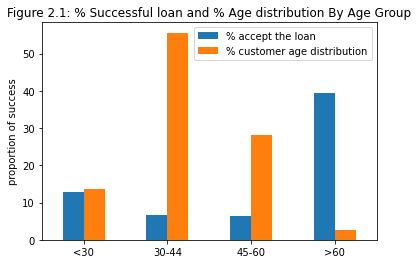

In [17]:
age_y_crosstab = pd.crosstab(final_dataset['y'],final_dataset['age_group']).\
                        apply(lambda x: x/x.sum() * 100, axis = 0)
cols = list(age_y_crosstab)
cols.insert(1, cols.pop(cols.index('Middle')))
age_y_crosstab = age_y_crosstab.loc[:, cols]
target = age_y_crosstab.loc['yes', ]
customers_age = pd.DataFrame(final_dataset['age_group'].value_counts())
customers_age['age_group'] = customers_age['age_group'] * 100 / customers_age['age_group'].sum()
age_yes_df = pd.concat([target, customers_age], axis = 1)
age_yes_df.columns = ['% accept the loan', '% customer age distribution']
age_yes_df.plot(kind = 'bar')
plt.ylabel('proportion of success')
plt.title('Figure 2.1: % Successful loan and % Age distribution By Age Group')
plt.xticks(np.arange(4), ('<30', '30-44', '45-60', '>60'), rotation = 'horizontal')
plt.show()

**Figure 2.1** shows the proportion of the customers accepting the loan grouped by Age and the distribution of age group in the whole dataset. As our imagine, older people will be more likely to allocate the assets in the low risky investment tools, in this case our loan, which cause the percentage of the successful response of older people is much higher than that of middle-aged people. However, the distribution of the age group in the dataset suggests that the bank put more focus on the middle-aged people (age 30 – 60), which may potentially miss the chance in the 60+ customers.

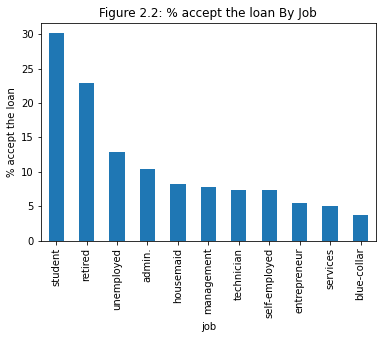

In [18]:
job_y_crosstab = pd.crosstab(final_dataset['y'],final_dataset['job']).apply(lambda x: x/x.sum() * 100)
job_y_crosstab = job_y_crosstab.T.sort_values(by = 'yes', ascending = False)['yes'].plot(kind = 'bar')
plt.title('Figure 2.2: % accept the loan By Job')
plt.ylabel('% accept the loan')
plt.show()

**Figure 2.2** shows the percentages of successful response grouped by job. This figure shows the similar pattern as 5.1 shows. Since **students** are the majority of the age < 30 and people whose age > 60 are most likely **retired** from the jobs. The percentage of successful response of student and retired people is more than 50%, which indicates potential high profits from these people groups.

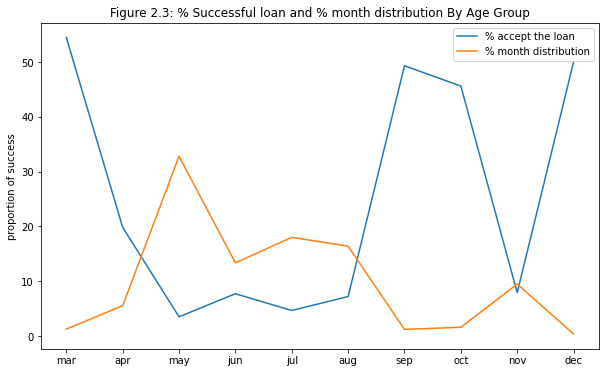

In [19]:
month_y_crosstab = pd.crosstab(final_dataset['y'],final_dataset['month']).\
                        apply(lambda x: x/x.sum() * 100, axis = 0)

cols = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_y_crosstab = month_y_crosstab.loc[:, cols]
target = month_y_crosstab.loc['yes', ]
customers_age = pd.DataFrame(final_dataset['month'].value_counts())
customers_age['month'] = customers_age['month'] * 100 / customers_age['month'].sum()
age_yes_df = pd.concat([target, customers_age], axis = 1)
age_yes_df.columns = ['% accept the loan', '% month distribution']
age_yes_df.plot(figsize = (10,6))
plt.ylabel('proportion of success')
plt.title('Figure 2.3: % Successful loan and % month distribution By Age Group')
plt.xticks(np.arange(10), cols)
plt.show()

Due to some data collecting reasons, our dataset missed the data of Jan and Feb, so we draw the figure 2.3 to see whether the successful response is related to the month effect. The blue line shows the percentage of successful response over each month and the orange line shows the distribution of the calls over each month. As the figure shows, the bank made the phone mainly in the summer, **from May to August**. However, although there are few calls, the perception of successful responses is high in **Mar, September October and December**, which may potentially show that the response of loan may have the month effects and the bank may decide an inappropriate timing of marketing campaign.

## Model Building

In order to evaluate the performance of the models, we use stratified method to split the dataset into **80%** training set and **20%** test set. We will check the classification models’ performance by **accuracy, precision, recall, F1-score, ROC curve and AUROC score**. We use the most popular and common algorithms with that is used in learning activities in the area of data mining. The model contains:

1. **Logistic Regression**: a statistical model for classifying the success/fail classes. Logistic regression classifies binary labels like Yes/No. In our dataset, most of the variables are dummies, so it is adaptive to use this probabilistic model to fit the data. The withdraw of the model is that it could not learn the high-dimension cross features information from the dataset.

2. **Decision Tree**: a tree structure model working on classification based on entropy and information gain. The outliers may cause the model not so stable, which is may cause the performance of the model not so good.

3. **Random Forest**: a combination of hundreds or thousands of decision trees training each one on separately and prediction are made by averaging of them. As the ensemble of the decision tree, Random Forest is not sensitive to outliers and may learn the high-dimension features of the dataset, so it may have a better performance.

4. **Support Vector Machine**: a model applied for classification and divide the dataset into classes to predict whether a new example falls into one category or other.

5. **Gaussian Naïve Bayes**: a classification model based on the Bayes theorem. This model may not so apply to our dataset since some of our features are not so like in Bayes distribution, but it still could perform well in non-Bayes distribution dataset.


In [77]:
scoring = ['precision', 'recall', 'accuracy', 'f1', 'roc_auc']
result_list = ['test_accuracy', 'test_precision', 'test_recall', 'test_f1', 'test_roc_auc']
model_names = ['GausNB', 'DT', 'LR', 'SVM', 'RF']

model_fit = [GaussianNB(), DecisionTreeClassifier(), LogisticRegression(), SVC(), RandomForestClassifier()]
result = []
'''
K-fold method, not used in the report
# train the model
for model_index in range(5):
    sub_result = []
    kfold = StratifiedKFold(n_splits = 20, shuffle = True)    
    cv_results = cross_validate(model_fit[model_index], dataset, dataset_y, cv = kfold, scoring = scoring)    
    for item in result_list:
        sub_result.append(np.round(cv_results[item].mean() * 100, 2) )
    result.append(sub_result)
    print('model ' + model_names[model_index] + ' completed')
'''

model GausNB completed
model DT completed
model LR completed
model SVM completed
model RF completed


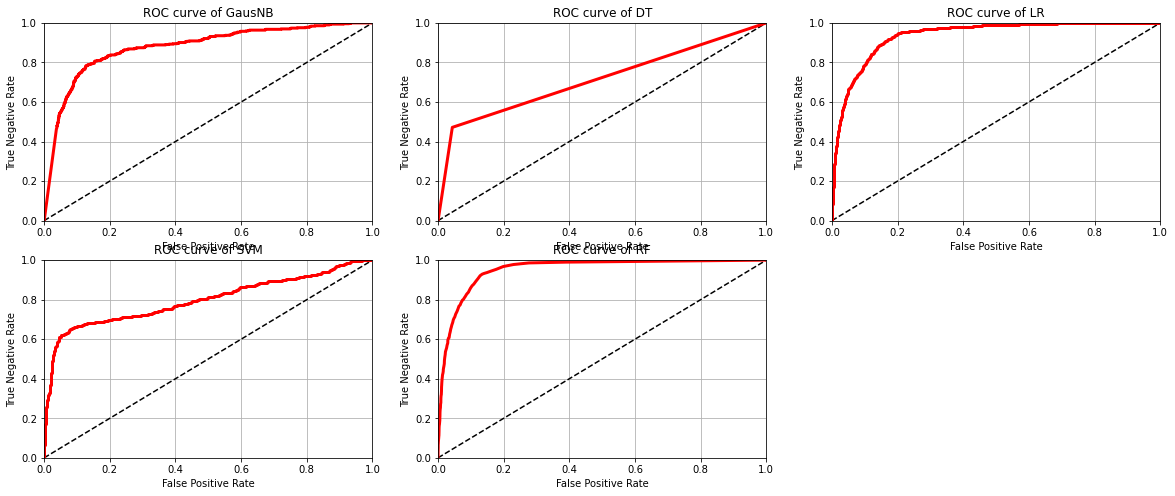

In [124]:
plt.figure(figsize=(20, 8))
for model_index in range(5):
    plt.subplot(2, 3, model_index + 1)
    if model_index == 3:
        sub_model = SVC(probability = True)
    else:
        sub_model = model_fit[model_index]
    sub_model.fit(X_train, Y_train)
    prediction = sub_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, prediction)
    aucval = auc(fpr, tpr)    # 计算auc的取值
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr,"r",linewidth = 3)
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Negative Rate")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    model_name = model_names[model_index]
    plt.title("ROC curve of " + model_name)
plt.savefig('ROC.png')
plt.show()

In [78]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(result, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models On Test set  \
                                                                     accuracy   
Classification Models                                                           
GausNB                                                             90.92        
DT                                                                 91.77        
LR                                                                 93.52        
SVM                                                                92.75        
RF                                                                 93.86        

                                                       
                      precision recall     f1 roc_auc  
Classification Models                                  
GausNB                    46.06  55.22  50.13   88.84  
DT                        50.23  52.55  51.28   73.92  
LR                        67.14  42.66  52.01   93.40  
SVM                       62.61  31.08  41.37   79.43  
RF                        68.28  47.89  56.17   94.94

**Random Forest** above all give the better results with %93.98 accuracy, %56.01 F1-score and %70.55 AUROC Score among five models compared to other models on the test set. Logistic Regression has almost similar metrics of Random Forest. The accuracy is %93.66, F1-score is %53.72 and precision is %67.69. 

Due to the highly **unbalanced** distribution of success/fail cases in the dataset, the Scores may be a little biased, and there is a need for stratified sampling or rebalancing to deal with this unbalanced structure of dataset. This leads to a good accuracy even on prediction of a near constant label however the F1-score becomes low.

In term of this, we try some methods to solve this problem. One is **SMOTE** algorithm, which is the popular used resampling method. It is an over-sampling method to deal with the unbalanced dataset. It will forge the class with less number in the dataset by searching the k-nearest point near each point of them. Then the algorithm will randomly produce the fake-samples between the line in the feature space. In our experiment, we will use SMOTE to resample the train set to get 70% train set and 30% test set, then after we create models, we calculate the performance on the test set.


In [94]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset, dataset_y, test_size = 0.2, stratify = dataset_y)
train_result = []
test_result = []
for model_index in range(5):
    train_sub_result = []
    test_sub_result = []
    if model_index == 3:
        sub_model = SVC(probability = True)
    else:
        sub_model = model_fit[model_index]
    sub_model.fit(X_train, Y_train)
    test_prediction = sub_model.predict(X_test)
    train_prediction =  sub_model.predict(X_train)
    test_accuracy = accuracy_score(Y_test, test_prediction)
    train_accuracy = accuracy_score(Y_train, train_prediction)
    test_f1 = f1_score(Y_test, test_prediction)
    train_f1 = f1_score(Y_train, train_prediction)
    test_precision = precision_score(Y_test, test_prediction)
    train_precision = precision_score(Y_train, train_prediction)
    test_recall = recall_score(Y_test, test_prediction)
    train_recall = recall_score(Y_train, train_prediction)
    test_roc = roc_auc_score(Y_test, test_prediction)
    train_roc = roc_auc_score(Y_train, train_prediction)
    
    train_result.append([train_accuracy, train_precision, train_recall, train_f1, train_roc])
    test_result.append([test_accuracy, test_precision, test_recall, test_f1, test_roc])
    print('model ' + model_names[model_index] + ' completed')


In [102]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(test_result, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models on test set'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models on test set  \
                                                                     accuracy   
Classification Models                                                           
GausNB                                                          0.912556        
DT                                                              0.920749        
LR                                                              0.936633        
SVM                                                             0.929276        
RF                                                              0.939809        

                                                               
                      precision    recall        f1   roc_auc  
Classification Models                                          
GausNB                 0.475465  0.568826  0.517972  0.756164  
DT                     0.521277  0.495951  0.508299  0.727473  
LR                     0.676923  0.445344  0.537241  0.713104  
SVM                    0.638132  0.331984  0.436751  0.657517  
RF                     0.705521  0.465587  0.560976  0.724046

In [104]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(train_result, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models on train set'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models on train set  \
                                                                      accuracy   
Classification Models                                                            
GausNB                                                          0.910337         
DT                                                              1.000000         
LR                                                              0.936546         
SVM                                                             0.927099         
RF                                                              0.999958         

                                                               
                      precision    recall        f1   roc_auc  
Classification Models                                          
GausNB                 0.463477  0.549645  0.502897  0.746211  
DT                     1.000000  1.000000  1.000000  1.000000  
LR                     0.677294  0.441236  0.534356  0.711164  
SVM                    0.617828  0.305471  0.408814  0.644239  
RF                     1.000000  0.999493  0.999747  0.999747

In [95]:
over_samples = SMOTE(random_state = 1234, sampling_strategy = 3 / 7)
over_samples_X, over_samples_y = over_samples.fit_resample(X_train, Y_train)
train_result_over = []
test_result_over = []
for model_index in range(5):
    train_sub_result_over = []
    test_sub_result_over = []
    if model_index == 3:
        sub_model = SVC(probability = True)
    else:
        sub_model = model_fit[model_index]
    sub_model.fit(over_samples_X, over_samples_y)
    test_prediction = sub_model.predict(X_test)
    train_prediction =  sub_model.predict(over_samples_X)
    test_accuracy = accuracy_score(Y_test, test_prediction)
    train_accuracy = accuracy_score(over_samples_y, train_prediction)
    test_f1 = f1_score(Y_test, test_prediction)
    train_f1 = f1_score(over_samples_y, train_prediction)
    test_precision = precision_score(Y_test, test_prediction)
    train_precision = precision_score(over_samples_y, train_prediction)
    test_recall = recall_score(Y_test, test_prediction)
    train_recall = recall_score(over_samples_y, train_prediction)
    test_roc = roc_auc_score(Y_test, test_prediction)
    train_roc = roc_auc_score(over_samples_y, train_prediction)
    
    train_result_over.append([train_accuracy, train_precision, train_recall, train_f1, train_roc])
    test_result_over.append([test_accuracy, test_precision, test_recall, test_f1, test_roc])
    print('model ' + model_names[model_index] + ' completed')

model GausNB completed
model DT completed
model LR completed
model SVM completed
model RF completed


In [127]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(train_result_over, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models on over sampling train set'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models on over sampling train set  \
                                                                                    accuracy   
Classification Models                                                                          
GausNB                                                          0.836230                       
DT                                                              1.000000                       
LR                                                              0.864966                       
SVM                                                             0.849179                       
RF                                                              1.000000                       

                                                               
                      precision    recall        f1   roc_auc  
Classification Models                                          
GausNB                 0.808554  0.594939  0.685490  0.767286  
DT                     1.000000  1.000000  1.000000  1.000000  
LR                     0.794802  0.741229  0.767081  0.829610  
SVM                    0.812425  0.646502  0.720028  0.791268  
RF                     1.000000  1.000000  1.000000  1.000000

In [163]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(test_result_over, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models on over sampling test set'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models on over sampling test set  \
                                                                                   accuracy   
Classification Models                                                                         
GausNB                                                          0.910550                      
DT                                                              0.919244                      
LR                                                              0.908544                      
SVM                                                             0.912724                      
RF                                                              0.938137                      

                                                               
                      precision    recall        f1   roc_auc  
Classification Models                                          
GausNB                 0.467305  0.593117  0.522748  0.766123  
DT                     0.510891  0.522267  0.516517  0.738626  
LR                     0.465086  0.714575  0.563448  0.820291  
SVM                    0.478659  0.635628  0.546087  0.786649  
RF                     0.662304  0.512146  0.577626  0.744318

**Random Forest** still performed the best among five models in the test set, which get %66.23 precision and %57.76 f1 score. However, although we can see that the recall score is higher after the over-sampling, the f1-score did not increase a lot. This may be because most of the variables in the dataset are dummies and it is little useful to create the point between 0 and 1 in the feature space, which implies that SMOTE may not forge very informatic samples. 

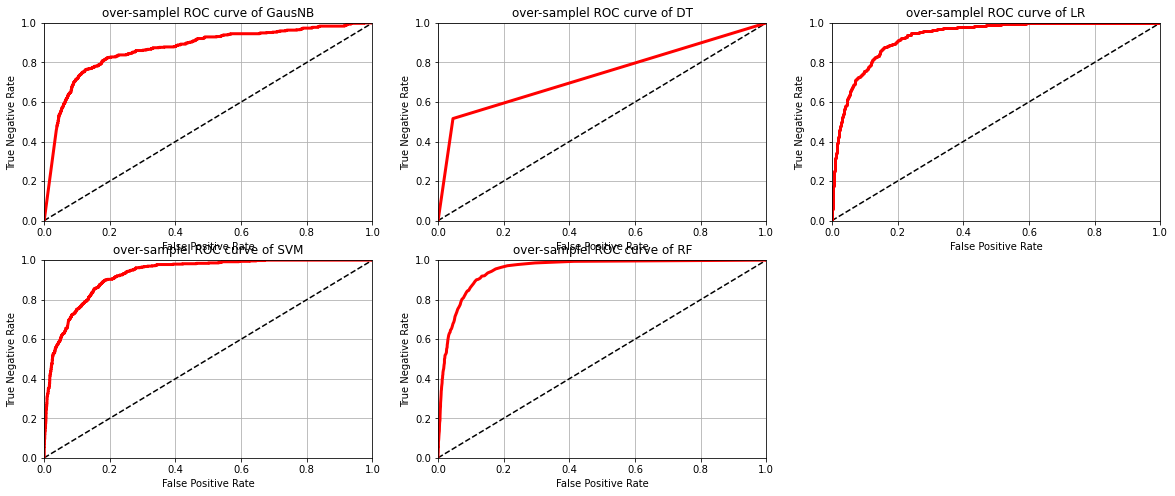

In [125]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20, 8))
for model_index in range(5):
    plt.subplot(2, 3, model_index + 1)
    if model_index == 3:
        sub_model = SVC(probability = True)
    else:
        sub_model = model_fit[model_index]
    sub_model.fit(over_samples_X, over_samples_y)
    prediction = sub_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, prediction)
    aucval = auc(fpr, tpr)    # 计算auc的取值
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr,"r",linewidth = 3)
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Negative Rate")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    model_name = model_names[model_index]
    plt.title("over-samplel ROC curve of " + model_name)
plt.savefig('ROC-over.png')
plt.show()

In [160]:
under_model = RandomUnderSampler(sampling_strategy = 3 / 7)
x_under, y_under = under_model.fit_resample(X_train, Y_train)
train_result_under = []
test_result_under = []
for model_index in range(5):
    train_sub_result_under = []
    test_sub_result_under = []
    if model_index == 3:
        sub_model = SVC(probability = True)
    else:
        sub_model = model_fit[model_index]
    sub_model.fit(x_under, y_under)
    test_prediction = sub_model.predict(X_test)
    train_prediction =  sub_model.predict(x_under)
    test_accuracy = accuracy_score(Y_test, test_prediction)
    train_accuracy = accuracy_score(y_under, train_prediction)
    test_f1 = f1_score(Y_test, test_prediction)
    train_f1 = f1_score(y_under, train_prediction)
    test_precision = precision_score(Y_test, test_prediction)
    train_precision = precision_score(y_under, train_prediction)
    test_recall = recall_score(Y_test, test_prediction)
    train_recall = recall_score(y_under, train_prediction)
    test_roc = roc_auc_score(Y_test, test_prediction)
    train_roc = roc_auc_score(y_under, train_prediction)
    
    train_result_under.append([train_accuracy, train_precision, train_recall, train_f1, train_roc])
    test_result_under.append([test_accuracy, test_precision, test_recall, test_f1, test_roc])
    print('model ' + model_names[model_index] + ' completed')

model GausNB completed
model DT completed
model LR completed
model SVM completed
model RF completed


In [164]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(train_result_under, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models on under sampling train set'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models on under sampling train set  \
                                                                                     accuracy   
Classification Models                                                                           
GausNB                                                          0.828723                        
DT                                                              1.000000                        
LR                                                              0.862614                        
SVM                                                             0.818997                        
RF                                                              1.000000                        

                                                               
                      precision    recall        f1   roc_auc  
Classification Models                                          
GausNB                 0.803584  0.567882  0.665479  0.754197  
DT                     1.000000  1.000000  1.000000  1.000000  
LR                     0.792031  0.735056  0.762480  0.826169  
SVM                    0.875360  0.462513  0.605237  0.717144  
RF                     1.000000  1.000000  1.000000  1.000000

In [165]:
col_name = []
for i in result_list:
    col_name.append(i[5:])
res = pd.DataFrame(test_result_under, columns = pd.MultiIndex.from_product([['Evaluation Metrics of Classification Models on under sampling test set'], col_name]), index = model_names)
res.index.name = 'Classification Models'
res

Evaluation Metrics of Classification Models on under sampling test set  \
                                                                                    accuracy   
Classification Models                                                                          
GausNB                                                          0.906872                       
DT                                                              0.884969                       
LR                                                              0.904865                       
SVM                                                             0.931115                       
RF                                                              0.916569                       

                                                               
                      precision    recall        f1   roc_auc  
Classification Models                                          
GausNB                 0.449275  0.564777  0.500448  0.751224  
DT                     0.394565  0.734818  0.513437  0.816653  
LR                     0.453646  0.742915  0.563315  0.831180  
SVM                    0.600490  0.495951  0.543237  0.733122  
RF                     0.496855  0.799595  0.612878  0.863348

Also, we try **Random under-sampling** to the dataset, which means that we throw some failure cases to balance the dataset. This method may have the implied risk that it may drop some information from the training set and may worsen the performance at last. We deduct the failure cases and make the proportion of failure: success = 7:3. The result is shown in table 3.4. 

Still, the **Random Forest** get the better performance than others, which get %91.66 accuracy and %61.29 f1-score. This time, the recall scores on the test set increase a lot, at the expense of the precision score. The f1-score did not increase a lot, which means that the under-sampling may be have a little effective, but problem of unbalancing still exists.

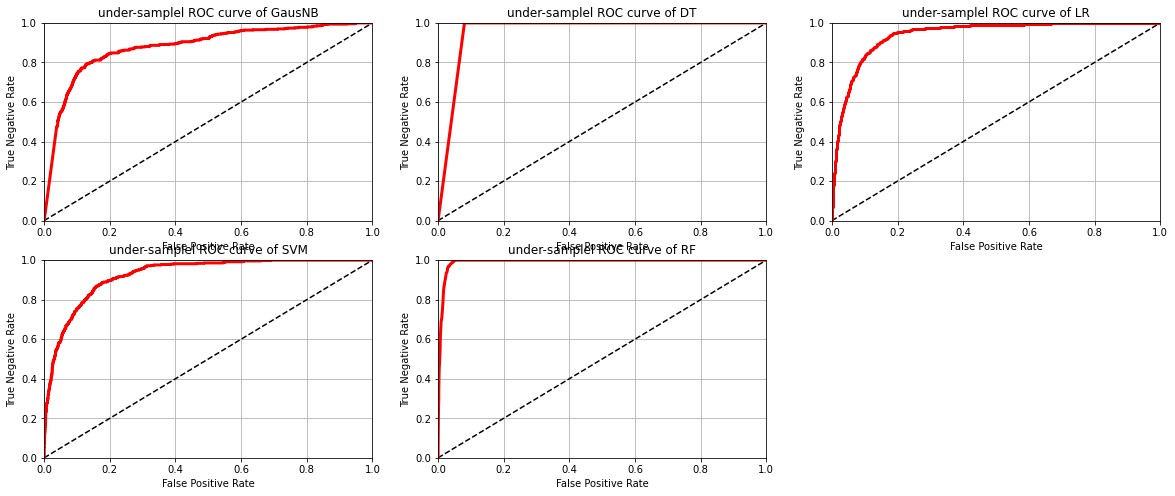

In [126]:
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(20, 8))
for model_index in range(5):
    plt.subplot(2, 3, model_index + 1)
    if model_index == 3:
        sub_model = SVC(probability = True)
    else:
        sub_model = model_fit[model_index]
    sub_model.fit(x_under, y_under)
    prediction = sub_model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(Y_test, prediction)
    aucval = auc(fpr, tpr)    # 计算auc的取值
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr,"r",linewidth = 3)
    plt.grid()
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Negative Rate")
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    model_name = model_names[model_index]
    plt.title("under-samplel ROC curve of " + model_name)
plt.savefig('under-over.png')
plt.show()

## Obversation and Conclusion

* The main target of this report is to analyze the dataset from Portuguese bank in order to improve the effectiveness of the bank’s telephone campaign. In the data visualization part, we found that age 60+ people, who are mostly retired people, and age 29- people, who are mostly students are the most responsive customers, which may need the bank to set more focus on them and make more calls and preferential to attract them. That may help the bank get more potential profits. Besides, the bank may change the major timing of call campaign to winter, such as September and October. The potential month effect of loan response may help the bank get more successful deposit. 

* As for the model selection, five algorithms (Gaussian Naïve Bayes, Decision Tree, Logistic Regression, SVM and Random Forest) were applied. Among them, the Random Forest Classifier has the advanced performance, therefore could be used as the final model to help accelerate the telemarking campaign opportunity and help the bank wasting less time on the potentially failure customers and increase the bank’s earning capacity. However, due to the unbalanced structure of the dataset, the performance is not so excellent. We have tried SMOTE and Random under sampling methods to resampling the dataset, but the performance is still not so ideal. Maybe there need more technologies and more accurate information to help us improve the performance of the models


### The following are the past idea. They have been dropped from the report.

In [ ]:

'''
# feature selection method 1: tree selection
from sklearn import metrics
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(dataset, dataset_y)
# display the relative importance of each attribute
# print(model.feature_importances_)
feature_importance = model.feature_importances_

# change the importance in to 0.00001 format
for item_index in range(len(feature_importance)):
    feature_importance[item_index] = round(feature_importance[item_index], 5)
    
    
feature_name = list(dataset.columns)
feature_name_sorted_ExtraTree = [i for _, i in sorted(zip(feature_importance, feature_name), reverse = True)]
print('Extra Tree sorted feature are:')
print(feature_name_sorted_ExtraTree)
feature_importance_sorted_ExtraTree = [i for i, _ in sorted(zip(feature_importance, feature_name), reverse = True)]
print('\n')
print('Extra Tree sorted importance are:')
print(feature_importance_sorted_ExtraTree)
'''

In [ ]:
'''
import pandas
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn.tree import export_text 

rfe_20 = feature_name_sorted_rfe[:20]
rfe_20_df = pd.DataFrame()
for attribute in rfe_20:
    rfe_20_df = pd.concat([rfe_20_df, dataset[attribute]], axis = 1)

repeat_times = 300
max_use_depth = 8

depth_list_precision = []
depth_list_accuracy = []
depth_list_recall = []

feature_dataset = rfe_20_df

for depth in range(2, max_use_depth + 1):
    precision_score_sum = 0
    accuracy_score_sum = 0
    recall_score_sum = 0
    for iteration in range(repeat_times):
        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(feature_dataset, dataset_y, test_size = 0.3, random_state = 1) # 70% training and 30% test

        # Create Decision Tree classifer object
        clf = DecisionTreeClassifier(criterion = "entropy", max_depth = depth)

        # Train Decision Tree Classifer
        clf = clf.fit(X_train, y_train)

        # Predict the response for test dataset
        y_pred = clf.predict(X_test)

        # print the tree
        #dot_data = tree.export_graphviz(clf, out_file = None,   
        #                     filled = True, rounded = True,
        #                     feature_names = list(feature_dataset.columns),
        #                     class_names = ['n', 'y'],
        #                     special_characters = True) 
        #graph = graphviz.Source(dot_data)
        #graph 
        # another way to print the tree
        #r = export_text(clf, feature_names = list(feature_dataset.columns))
        #print(r)

        # Model scores
        precision_score_sum += metrics.precision_score(y_test, y_pred)
        accuracy_score_sum += metrics.accuracy_score(y_test, y_pred)
        recall_score_sum += metrics.recall_score(y_test, y_pred)
        
        if iteration % 50 == 49:
            print('When depth is ', depth)
            print("iteration " + str(iteration + 1))
            print('average precision is ', precision_score_sum / iteration)
            print('average accuracy is ', accuracy_score_sum / iteration)
            print('average recall is ', recall_score_sum / iteration)
    precision_score = precision_score_sum / repeat_times
    accuracy_score = accuracy_score_sum / repeat_times
    recall_score = recall_score_sum / repeat_times
    depth_list_precision.append(round(precision_score, 5))
    depth_list_accuracy.append(round(accuracy_score, 5))
    depth_list_recall.append(round(recall_score, 5))
print('The precision scores with depth from 2 to ' + str(max_use_depth) + " are:\n", str(depth_list_precision))
print('The accuracy scores with depth from 2 to ' + str(max_use_depth) + " are:\n", str(depth_list_accuracy))
print('The recall scores with depth from 2 to ' + str(max_use_depth) + " are:\n", str(depth_list_recall))
'''

In [ ]:
'''
fig = plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.plot(list(range(2, max_use_depth + 1)), depth_list_precision)
plt.title('The precision scores with depth from 2 to ' + str(max_use_depth))
plt.subplot(312)
plt.plot(list(range(2, max_use_depth + 1)), depth_list_accuracy)
plt.title('The accuracy scores with depth from 2 to ' + str(max_use_depth))
plt.subplot(313)
plt.plot(list(range(2, max_use_depth + 1)), depth_list_recall)
plt.title('The recall scores with depth from 2 to ' + str(max_use_depth))
plt.savefig("DT.png")
plt.show()
'''

In [ ]:
'''from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)
clf = clf.fit(rfe_20_df, dataset_y)
plt.figure(figsize = (16, 12))
plot_tree(clf, filled = True, feature_names = list(rfe_20_df.columns), class_names = ['n', 'y'])
plt.title("Decision tree trained on all the datasets with max depth 3")
plt.savefig('decision tree result')
plt.show()
'''

In [ ]:
'''
from sklearn.linear_model import LogisticRegression

# feature selection method 2: RFE searching 
# we should use this method again to calculate all the importance of attributes when using LR
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
LR_rfe = RFE(LR_model, 4) # 4 is important because we choose the number of attributes from 5
LR_rfe = LR_rfe.fit(dataset, dataset_y)
LR_feature_name = list(dataset.columns)
LR_feature_name_sorted_rfe = [i for _, i in sorted(zip(LR_rfe.ranking_, feature_name))]
LR_feature_importance_sorted_rfe = [i for i, _ in sorted(zip(LR_rfe.ranking_, feature_name))]

repeat_times = 300
LR_n_attributes_list_precision = []
LR_n_attributes_list_accuracy = []
LR_n_attributes_list_recall = []
for n_attributes in range(5, 31):
    LR_rfe_n = LR_feature_name_sorted_rfe[:n_attributes]
    LR_rfe_n_df = pd.DataFrame()
    for attribute in LR_rfe_n:
        LR_rfe_n_df = pd.concat([LR_rfe_n_df, dataset[attribute]], axis = 1)
        
        
    LR_feature_dataset = LR_rfe_n_df
    LR_precision_score_sum = 0
    LR_accuracy_score_sum = 0
    LR_recall_score_sum = 0
    
    
    for iteration in range(repeat_times):
        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(LR_feature_dataset, dataset_y, test_size = 0.3, random_state = 1) # 70% training and 30% test

        # Logistic Regression
        LR_clf = LogisticRegression().fit(X_train, y_train)
        y_pred = LR_clf.predict(X_test)

        # Model scores
        LR_precision_score_sum += metrics.precision_score(y_test, y_pred)
        LR_accuracy_score_sum += metrics.accuracy_score(y_test, y_pred)
        LR_recall_score_sum += metrics.recall_score(y_test, y_pred)

        if iteration % 50 == 49:
            print('The number of attributes is ', n_attributes)
            print("iteration " + str(iteration + 1))
            print('average precision is ', LR_precision_score_sum / iteration)
            print('average accuracy is ', LR_accuracy_score_sum / iteration)
            print('average recall is ', LR_recall_score_sum / iteration)

    LR_precision_score = LR_precision_score_sum / repeat_times
    LR_accuracy_score = LR_accuracy_score_sum / repeat_times
    LR_recall_score = LR_recall_score_sum / repeat_times
    LR_n_attributes_list_precision.append(LR_precision_score)
    LR_n_attributes_list_accuracy.append(LR_accuracy_score)
    LR_n_attributes_list_recall.append(LR_recall_score)
'''

In [ ]:
'''
print('The precision scores with number of attributes for LR from 5 to 30 are:\n', LR_n_attributes_list_precision)
print('The accuracy scores with number of attributes for LR from 5 to 30 are:\n', LR_n_attributes_list_accuracy)
print('The recall scores with number of attributes for LR from 5 to 30 are:\n', LR_n_attributes_list_recall)
'''

In [ ]:
'''
fig = plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.plot(list(range(5, 31)), LR_n_attributes_list_precision)
plt.title('The precision scores with number of attributes from 5 to 30')
plt.subplot(312)
plt.plot(list(range(5, 31)), LR_n_attributes_list_accuracy)
plt.title('The accuracy scores with number of attributes from 5 to 30')
plt.subplot(313)
plt.plot(list(range(5, 31)), LR_n_attributes_list_recall)
plt.title('The recall scores with number of attributes from 5 to 30')
plt.savefig("LR")
plt.show()
'''

In [ ]:
'''
# SVM model
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
import warnings
warnings.filterwarnings('ignore')


SVM_model = LinearSVC()
SVM_rfe = RFE(SVM_model, 4) # 4 is important because we choose the number of attributes from 5
SVM_rfe = SVM_rfe.fit(dataset, dataset_y)
feature_name = list(dataset.columns)
SVM_feature_name_sorted_rfe = [i for _, i in sorted(zip(SVM_rfe.ranking_, feature_name))]
SVM_feature_importance_sorted_rfe = [i for i, _ in sorted(zip(SVM_rfe.ranking_, feature_name))]

repeat_times = 300
SVM_n_attributes_list_precision = []
SVM_n_attributes_list_accuracy = []
SVM_n_attributes_list_recall = []
for n_attributes in range(5, 31):
    SVM_rfe_n = SVM_feature_name_sorted_rfe[:n_attributes]
    SVM_rfe_n_df = pd.DataFrame()
    for attribute in SVM_rfe_n:
        SVM_rfe_n_df = pd.concat([SVM_rfe_n_df, dataset[attribute]], axis = 1)
        
    SVM_feature_dataset = SVM_rfe_n_df
    SVM_precision_score_sum = 0
    SVM_accuracy_score_sum = 0
    SVM_recall_score_sum = 0
    
    for iteration in range(repeat_times):
        # Split dataset into training set and test set
        X_train, X_test, y_train, y_test = train_test_split(SVM_feature_dataset, dataset_y, test_size = 0.3, random_state = 1) # 70% training and 30% test

        # SVM
        SVM_clf = LinearSVC().fit(X_train, y_train)
        y_pred = SVM_clf.predict(X_test)

        # Model scores
        SVM_precision_score_sum += metrics.precision_score(y_test, y_pred)
        SVM_accuracy_score_sum += metrics.accuracy_score(y_test, y_pred)
        SVM_recall_score_sum += metrics.recall_score(y_test, y_pred)

        if iteration % 50 == 49:
            print('The number of attributes is ', n_attributes)
            print("iteration " + str(iteration + 1))
            print('average precision is ', SVM_precision_score_sum / iteration)
            print('average accuracy is ', SVM_accuracy_score_sum / iteration)
            print('average recall is ', SVM_recall_score_sum / iteration)

    SVM_precision_score = SVM_precision_score_sum / repeat_times
    SVM_accuracy_score = SVM_accuracy_score_sum / repeat_times
    SVM_recall_score = SVM_recall_score_sum / repeat_times
    SVM_n_attributes_list_precision.append(SVM_precision_score)
    SVM_n_attributes_list_accuracy.append(SVM_accuracy_score)
    SVM_n_attributes_list_recall.append(SVM_recall_score)
'''

In [ ]:
'''
fig = plt.figure(figsize=(10, 12))
plt.subplot(311)
plt.plot(list(range(5, 31)), SVM_n_attributes_list_precision)
plt.title('The precision scores with number of attributes from 5 to 30')
plt.subplot(312)
plt.plot(list(range(5, 31)), SVM_n_attributes_list_accuracy)
plt.title('The accuracy scores with number of attributes from 5 to 30')
plt.subplot(313)
plt.plot(list(range(5, 31)), SVM_n_attributes_list_recall)
plt.title('The recall scores with number of attributes from 5 to 30')
plt.savefig("SVM.png")
plt.show()
'''